In [18]:
import h5py
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [19]:
centrals = h5py.File("../data/eagle_central_new_galaxies.h5", 'r')

In [20]:
logmstar = centrals["logmstar"][:]
logmhalo = centrals["logmhalo"][:]
x = centrals["x"][:]
y = centrals["y"][:]
z = centrals["z"][:]
g_minus_r = centrals["g_minus_r"][:]

Text(0,0.5,u'normalized counts')

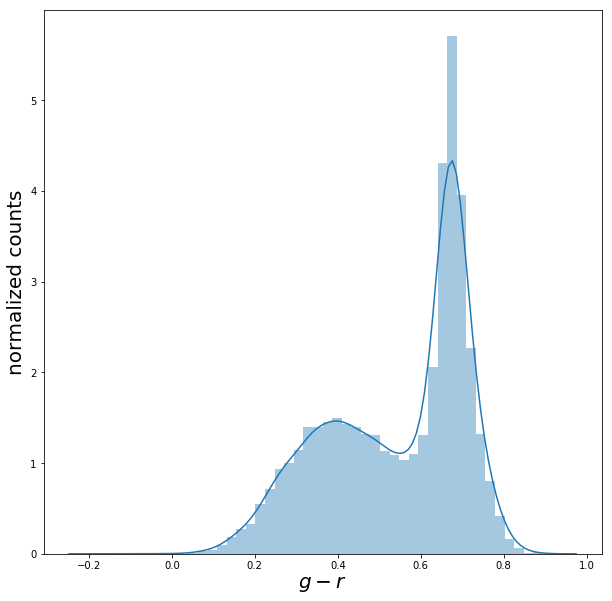

In [21]:
plt.figure(figsize = (10,10))
sns.distplot(g_minus_r)
plt.xlabel(r"$g-r$", fontsize = 20)
plt.ylabel("normalized counts" , fontsize = 20)

Text(0,0.5,u'normalized counts')

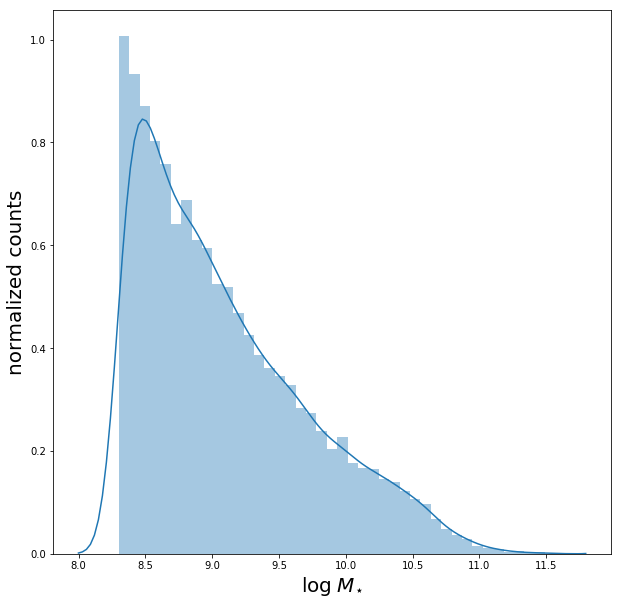

In [22]:
plt.figure(figsize = (10,10))
sns.distplot(logmstar)
plt.xlabel(r"$\log \; M_{\star}$", fontsize = 20)
plt.ylabel("normalized counts" , fontsize = 20)

In [29]:
def red_blue_split(color, logm):
    
    color_cut = 0.6 * (logm/8.5)**0.6
    
    red_mask = color > color_cut 
    
    return red_mask

In [30]:
red_mask = red_blue_split(g_minus_r, logmstar)

Text(0,0.5,u'$g-r$')

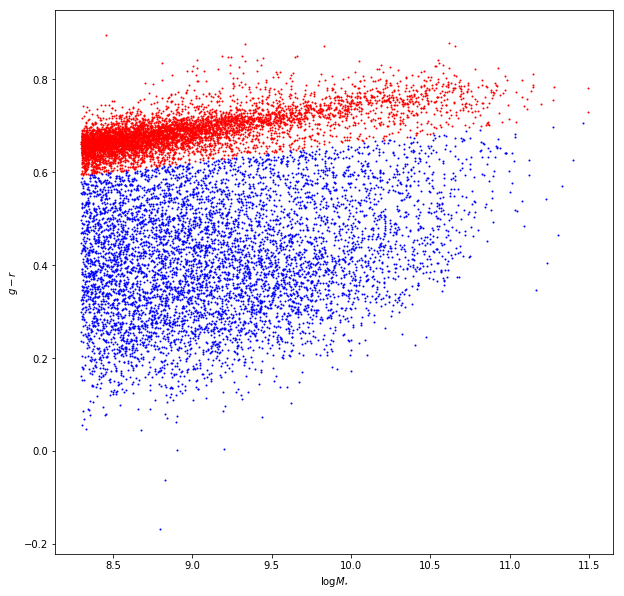

In [32]:
plt.figure(figsize=(10,10))

plt.scatter(logmstar[red_mask], g_minus_r[red_mask], s= 1. , c= "r")
plt.scatter(logmstar[~red_mask], g_minus_r[~red_mask], s= 1. , c= "b")
plt.xlabel(r"$\log M_{\star}$", fontsize = 10)
plt.ylabel(r"$g-r$", fontsize = 10)

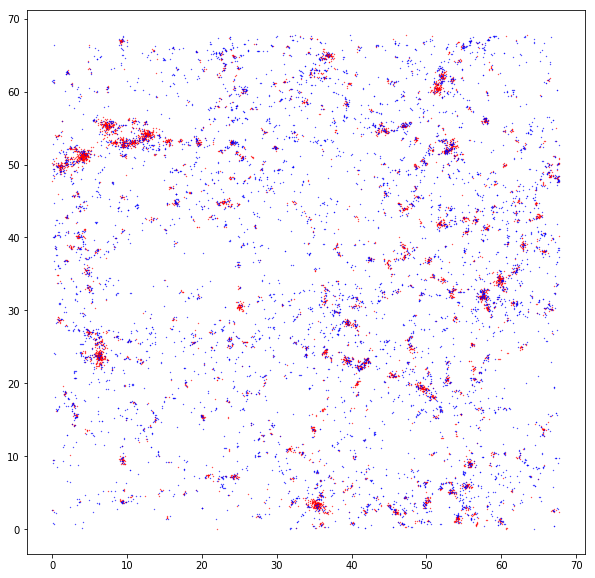

In [39]:
plt.figure(figsize=(10,10))
plt.scatter(x[red_mask],y[red_mask], s= 0.1, c= "r")
plt.scatter(x[~red_mask],y[~red_mask], s= 0.1, c= "b")

In [40]:
mstar_bins = [9.5,10,10.5,11]

In [44]:
data = np.vstack([x,y,z, logmstar, logmhalo, g_minus_r]).T